# Assignment 1: Black-Scholes Model and Binomial Tree



## Part I:  *Option Valuation*

In [ ]:
# End time
T = 1
# number of steps
M = 50

# step_size
dt = T/M

# interest rate
r = 0.06

# stock Price
S = 100

# strike Price
K = 99
sigma = .2
M = 50

# 
a = np.exp(r*dt)

# up
u = np.exp(sigma*np.sqrt(dt))

# down
d = 1/u

# probability
p = (a - d) / (u - d)




### 1.1

In [ ]:
# data matrix
data_dict = {}

T = 1
dt = T/M
r = 0.06
S = 100
K = 99
sigma = .2

M = 50    

a = np.exp(r*dt)
u = np.exp(sigma*np.sqrt(dt))
d = 1/u
p = (a - d) / (u - d)

W = np.zeros((M+1,1))

# asset price at time T
for n in range(0,M+1):
    W[n] = S*(u**(M-n))*(d**(n));

# option values at time T
for n in range(0,M+1):
    W[n] = max(W[n] - K,0)

# retrace to get option value at time zero
for i in range(M,0,-1):
    for n in range(0,i):
        W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])


print('Option value: ' +str(W[0][0]))
# print(data_dict)

In [ ]:
from ipykernel import kernelapp as app
import numpy as np
# data matrix
data_dict = {}
W = np.zeros((M+1,1))
M = 50

sigmas = np.linspace(0.01,1.0,100)
x = sigmas
y = []
for sigma in sigmas:
    
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));
    
    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
#         if i == 2:
#             # W[0] = W[n]
#             # W[1] = W[n+1]

#             f_up = W[0]
#             f_down = W[1]
#             S_up = S*u
#             S_down = S*d
            
#             delta = (f_up-f_down)/(S_up-S_down)
        
    y.append(W[0][0])
    data_dict[sigma] =  {"option_value" : W[0][0]}
plt.figure(dpi=250)
plt.ylim([0,80])
ax = plt.subplot(111)
ax.plot(x,y,'k')
ax.set_xlabel('Volatility (Sigma)')
ax.set_ylabel('Option Value')
ax.set_title('Europian Option Price for different Volatilities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
plt.savefig('./images/EU_OptionPrice_Volatilities.png', bbox_inches='tight')
plt.show()


#     print('Option value for sigma='+str(sigma)+': '+str(W[0][0]))
# print(data_dict)

### 1.2

In [ ]:
import time
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import array


T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
sigma = .2 # Volatility

steps = []
Ms = array.array('i',(i for i in range(50,2000, 50)))
for M in Ms:
    step = 0

    dt = T/M
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)
    
    W = np.zeros((M+1,1))

    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)
        step+=1
    
    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
            step+=1
    
    
    steps.append(step)

#     print('duration for M='+str(M)+': '+str(duration))
    
# print(step)

In [ ]:
plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(Ms,steps,'k')
ax.set_xlabel('Number of Timesteps (T/M)')
ax.set_ylabel('Duration (steps)')
ax.set_title('Computational Complexity')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.axes.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
plt.savefig('./images/EU_Complexity.png', bbox_inches='tight')
plt.show()

In [ ]:
complexity = lambda N: N**2/2 + 2*(N+1)
complexity = lambda N: N*((N+1)+2)/2

complexity(51)

### 1.3


In [ ]:
import matplotlib.pyplot as plt
T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
sigma = .2 # Volatility

W = np.zeros((M+1,1))

sigmas = np.linspace(0.01,1.0,100)
x = sigmas
BS_y = []
BT_y = []
for sigma in sigmas:
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)

    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)

    # retrace to get option value at time zero
    for i in range(M,0,-1):
        for n in range(0,i):
            W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])
            if i == 2 and n == 1:
                f_up = W[0]
                f_down = W[1]
                S_up = S*u
                S_down = S*d

                BT_delta = (f_up-f_down)/(S_up-S_down)

#     print("Binominal Tree Delta value: "+str(delta[0]))
    t = 0
    d1 = (1/sigma*np.sqrt(T-t))*(np.log(S/K)+(r+(sigma**2/2)*(T-t)))

    from scipy.stats import norm
    BS_delta = norm.cdf(d1)
    
    BS_y.append(BS_delta)
    BT_y.append(BT_delta)
#     print("Black-Scholes Delta value: "+str(norm.cdf(d1)))
plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(x,BS_y,label='Black Scholes')
ax.plot(x,BT_y,label='Binomial Tree')
ax.set_xlabel('Volatility (Sigma)')
ax.set_ylabel('Delta')
ax.set_title('Delta for different Volatilities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.legend()
plt.savefig('./images/EU_OptionPrice_Volatilities.png', bbox_inches='tight')
plt.show()

### 1.4

In [ ]:
import time
import matplotlib.pyplot as plt
T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
sigma = .2 # Volatility

def calc_US_option_price(T,M,option):
    dt = T/M
    a = np.exp(r*dt)
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (a - d) / (u - d)

    W = np.zeros((M+1,1))
    
    # asset price at time T
    for n in range(0,M+1):
        W[n] = S*(u**(M-n))*(d**(n));

    # option values at time T
    for n in range(0,M+1):
        W[n] = max(W[n] - K,0)

    if option == 'put':
        # retrace to get option value at time zero
        for i in range(M,0,-1):
            for n in range(0,i):
                W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])

                # PUT - Strike price - stock price at given t
                W[n] = max(K-S*(u**(i-n-1))*(d**n), W[n])
                
    elif option == 'call':
        for i in range(M,0,-1):
            for n in range(0,i):
                W[n] = np.exp(-r*dt)*(p*W[n] + (1-p)*W[n+1])

                # CALL
                W[n] = max(S*(u**(i-n-1))*(d**n)-K, W[n])

    return W[0][0]

print("The option price for a American call: " + str(calc_US_option_price(T,M,'call')))
print("The option price for a American put: " + str(calc_US_option_price(T,M,'put')))

# CALL SHOULD BE THE SAME
# PUT SHOULD BE DIFFERENT

In [ ]:
T = 1 # End time
M = 50 # Number of steps
dt = T/M # Step_size
r = 0.06 # Interest rate
S = 100 # Stock Price
K = 99 # Strike Price
# sigma = .2 # Volatility


sigmas = np.linspace(0.01,1.0,100)
x = sigmas
y_put = []
y_call = []
for sigma in sigmas:

    y_call.append(calc_US_option_price(T,M,'call'))
    y_put.append(calc_US_option_price(T,M,'put'))
    
plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(x,y_put,label='put')
ax.plot(x,y_call,label='call')
ax.set_xlabel('Volatility (Sigma)')
ax.set_ylabel('Option Value')
ax.set_title('US Option Price for different Volatilities')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.legend()
plt.savefig('./images/EU_OptionPrice_Volatilities.png', bbox_inches='tight')
plt.show()

## Part II:  *Hedging Simulations*

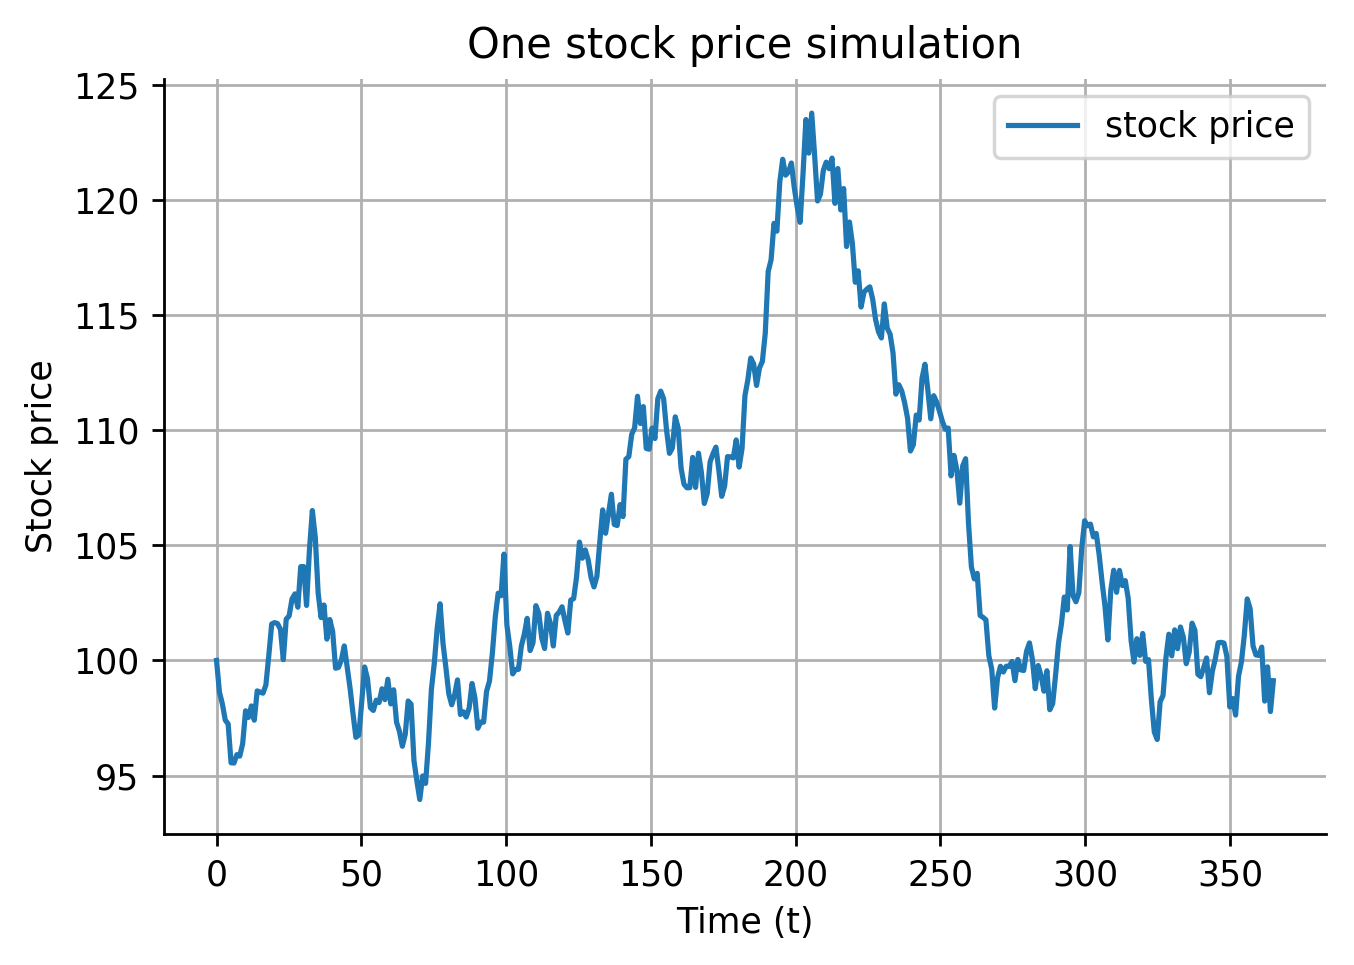

In [57]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.axes as axes

# Stock price
S_0 = 100
r = 0.06
sigma = 0.20
K = 99
T = 1
M = 364
dt = T / M

def random_numbers():
    epsilon = np.random.randn(M,1)
    return epsilon
    
def Stock_price_dynamics(S, epsilon):
    return r * S * dt + sigma * S * epsilon * np.sqrt(dt)

def d1(S, t):    
    return (np.log(S/K) + (r + 0.5*sigma**2) * (T - t)) / (sigma*np.sqrt(T - t))

def full_simulation():
    epsilon = random_numbers()

    Stock_prices = []
    Stock_prices.append(S_0)

    delta = []
    delta.append(norm.cdf(d1(S_0, 0)))


    for i in range(1, M+1):
        t = i * dt
        Stock_prices.append(Stock_prices[i-1] + Stock_price_dynamics(Stock_prices[i-1], epsilon[i-1])[0])

        if i < M:
            d11 = d1(Stock_prices[i], t)
            delta.append(norm.cdf(d11))
        else:
            delta.append(1)

    return Stock_prices, delta
    
Stock_prices, delta = full_simulation()

      

x = np.linspace(0,len(Stock_prices),len(Stock_prices)) 

plt.figure(dpi=250)
ax = plt.subplot(111)
ax.plot(x,Stock_prices,label='stock price')
ax.set_xlabel('Time (t)')
ax.set_ylabel('Stock price')
ax.set_title('One stock price simulation')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
ax.legend()
plt.savefig('./images/EU_OptionPrice_Volatilities.png', bbox_inches='tight')
plt.show()
    
# dt = T / (M/7)

# # week_delta = np.zeros((M/7,1))
# week_delta = []
# for i in range(0, M+1, 7):
#     d11 = d1(Stock_prices[i] ,t)
#     week_delta.append(norm.cdf(d11))
# print(week_delta)


# norm.cdf(d1(Stock_prices[i-1]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


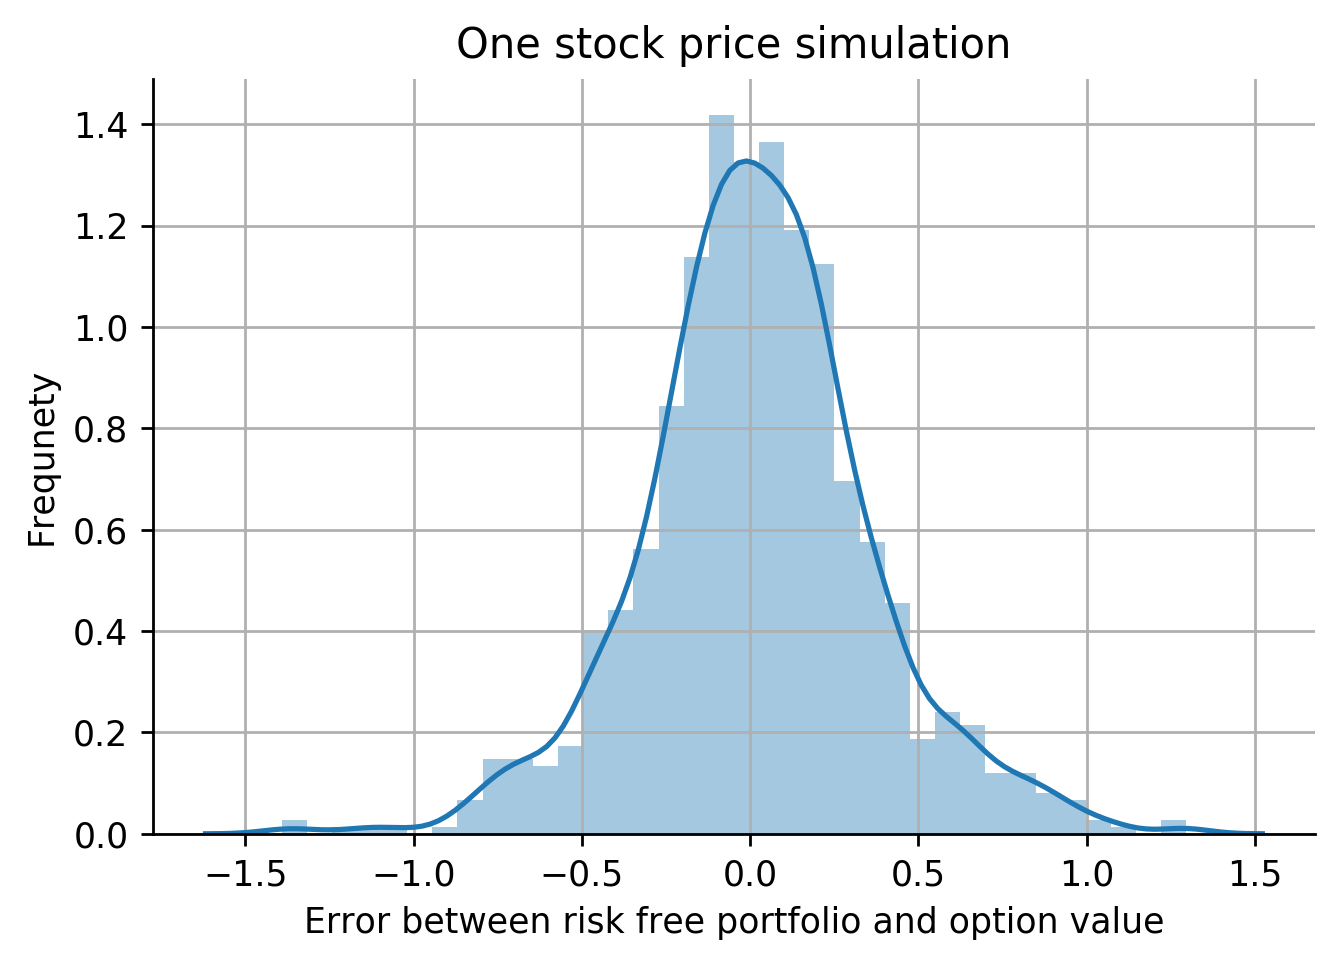

In [66]:
import seaborn as sns

def option_price(t, S):
    from scipy.stats import norm
    
    d1 = (np.log(S/K) + (r + 0.5*sigma**2) * (T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)

    VCall = S * norm.cdf(d1) - K * np.exp(-r*(T-t)) * norm.cdf(d2)
    
    return VCall

    
def hedge_all():
    
    Stock_prices, delta = full_simulation()  
    option_value = []
    delta_stock = []
    cash = []
    error = []

    for i, price in enumerate(Stock_prices):
        t = i * dt
        if i == 0:
            option_value.append(option_price(t, price))
            delta_stock.append(price * delta[i])
            cash.append(option_value[i] - delta_stock[i])
            error.append(option_value[i] - cash[i] - delta_stock[i])
        elif i < (len(Stock_prices) - 1):
            option_value.append(option_price(t, price))
            delta_stock.append(price * delta[i])
            difference_delta = delta[i] - delta[i - 1]
            new_cash = cash[i - 1] * np.exp(r*dt) - (difference_delta * price)
            cash.append(new_cash)
            error.append(option_value[i] - cash[i] - delta_stock[i])
        else:
            option_value.append(option_price(t, price))
            delta_stock.append(price * delta[i])
            difference_delta = delta[i] - delta[i - 1]
            new_cash = cash[i - 1] * np.exp(r*dt) - (difference_delta * price)
            cash.append(new_cash)
            error.append(option_value[i] - cash[i] - delta_stock[i])
#     print(error)
    
    return error[-2]
    
bar_data_day = []
for i in range(1000):
    bar_data_day.append(hedge_all())
    

plt.figure(dpi=250)
ax = sns.distplot(bar_data_day, kde=True, rug=False);
ax.set_xlabel('Error between risk free portfolio and option value')
ax.set_ylabel('Frequnety')
ax.set_title('One stock price simulation')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
plt.savefig('./images/hadgeing_simulation.png', bbox_inches='tight')
plt.show()    

    

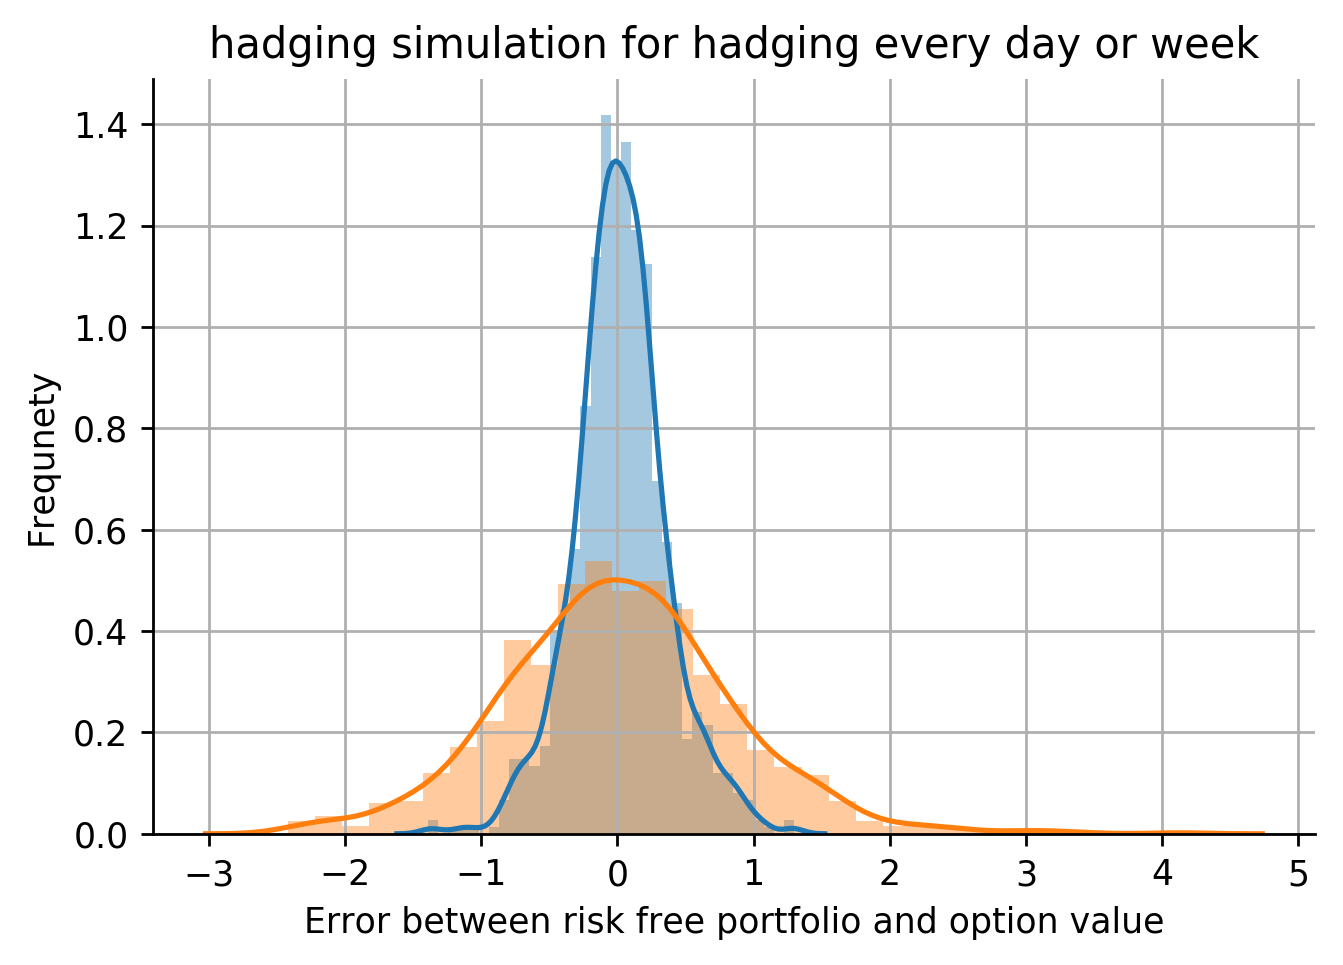

In [67]:

plt.figure(dpi=250)
ax = sns.distplot(bar_data_day, kde=True, rug=False);
ax = sns.distplot(bar_data_week, kde=True, rug=False);
ax.set_xlabel('Error between risk free portfolio and option value')
ax.set_ylabel('Frequnety')
ax.set_title('hadging simulation for hadging every day or week')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()
plt.savefig('./images/hadgeing_simulation.png', bbox_inches='tight')
plt.show()    